In [2]:
#import
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('heart_out.csv')

In [4]:
df.head()

,Unnamed: 0,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0,63,1,145,233,1,150,0,2.3,0,...,1,0,0,1,0,0,0,1,0,0
1,1,37,1,130,250,0,187,0,3.5,0,...,0,1,0,1,0,0,0,0,1,0
2,2,41,0,130,204,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,1,0
3,3,56,1,120,236,0,178,0,0.8,0,...,0,1,0,0,0,1,0,0,1,0
4,4,57,0,120,354,0,163,1,0.6,0,...,0,1,0,0,0,1,0,0,1,0


In [5]:
X = df.drop(columns = ['target'])
y = df['target']
print(y.head())
print(X.head())


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64
   Unnamed: 0  age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  \
0           0   63    1       145   233    1      150      0      2.3   0   
1           1   37    1       130   250    0      187      0      3.5   0   
2           2   41    0       130   204    0      172      0      1.4   0   
3           3   56    1       120   236    0      178      0      0.8   0   
4           4   57    0       120   354    0      163      1      0.6   0   

   ...  restecg_0  restecg_1  restecg_2  slope_0  slope_1  slope_2  thal_0  \
0  ...          1          0          0        1        0        0       0   
1  ...          0          1          0        1        0        0       0   
2  ...          1          0          0        0        0        1       0   
3  ...          0          1          0        0        0        1       0   
4  ...          0          1          0        0        0        1       0   

   tha

In [6]:
gnb = GaussianNB()
scores = []
kf = KFold(n_splits = 3, shuffle=True, random_state=22)
gnb_table = pd.DataFrame(columns = ['accuracy'], index = ['Fold 1', 'Fold 2', 'Fold 3'])
for train, test in kf.split(X):
    gnb.fit(X.iloc[train], y.iloc[train])
    scores.append(gnb.score(X.iloc[test], y.iloc[test]))


print(scores)
gnb_table['accuracy'] = scores
gnb_table

[0.8316831683168316, 0.900990099009901, 0.8811881188118812]


,accuracy
Fold 1,0.831683
Fold 2,0.900990
Fold 3,0.881188


In [7]:

forest_size = [1,5,10,20,30, 40, 50]
kf = KFold(n_splits = 3, shuffle=True, random_state=22)
forest_table_test = pd.DataFrame(columns = forest_size)
forest_table_train = pd.DataFrame(columns = forest_size)

for count in forest_size:
    rand_forest = RandomForestClassifier(criterion='gini', n_estimators=count, max_depth=3, random_state=0, n_jobs=-1)
    scores = []
    scores_train = []
    for train, test in kf.split(X):
        rand_forest.fit(X.iloc[train], y.iloc[train])
        scores.append(rand_forest.score(X.iloc[test], y.iloc[test]))
        scores_train.append(rand_forest.score(X.iloc[train], y.iloc[train]))
    forest_table_test[count] = scores
    forest_table_train[count] = scores_train
forest_table_test




,1,5,10,20,30,40,50
0,0.712871,0.900990,0.970297,0.940594,0.930693,0.960396,0.990099
1,0.752475,0.910891,0.960396,0.970297,0.950495,0.960396,0.970297
2,0.801980,0.950495,0.980198,0.930693,0.970297,0.980198,0.990099


In [8]:
print(forest_table_train)

1         5         10        20        30        40        50
0  0.797030  0.935644  0.980198  0.990099  0.985149  0.990099  0.995050
1  0.787129  0.915842  0.980198  0.985149  0.975248  0.980198  0.985149
2  0.836634  0.960396  0.975248  0.960396  0.985149  0.990099  0.990099


In [14]:
forest_table_test = forest_table_test.transpose()
forest_table_test = forest_table_test.rename(columns={0: "Fold 1", 1: "Fold 2", 2: "Fold 3"}, errors="raise")
forest_table_test

,Fold 1,Fold 2,Fold 3
1,0.712871,0.752475,0.801980
5,0.900990,0.910891,0.950495
10,0.970297,0.960396,0.980198
20,0.940594,0.970297,0.930693
30,0.930693,0.950495,0.970297
40,0.960396,0.960396,0.980198
50,0.990099,0.970297,0.990099


In [13]:
forest_table_train = forest_table_train.transpose()
forest_table_train = forest_table_train.rename(columns={0: "Fold 1", 1: "Fold 2", 2: "Fold 3"}, errors="raise")
forest_table_train

,Fold 1,Fold 2,Fold 3
1,0.797030,0.787129,0.836634
5,0.935644,0.915842,0.960396
10,0.980198,0.980198,0.975248
20,0.990099,0.985149,0.960396
30,0.985149,0.975248,0.985149
40,0.990099,0.980198,0.990099
50,0.995050,0.985149,0.990099


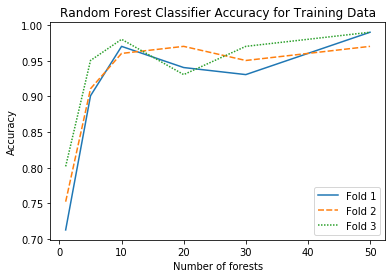

In [16]:
graph = sns.lineplot(data = forest_table_test, style = 'fold')
graph.set(xlabel = 'Number of forests', ylabel = 'Accuracy', title = 'Random Forest Classifier Accuracy for Testing Data')
graph

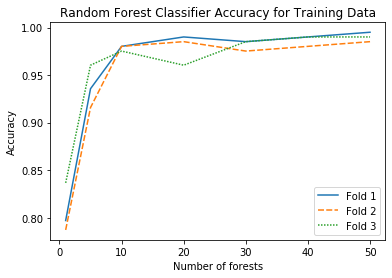

In [17]:
graph = sns.lineplot(data = forest_table_train, style = 'fold')
graph.set(xlabel = 'Number of forests', ylabel = 'Accuracy', title = 'Random Forest Classifier Accuracy for Training Data')
graph

In [ ]:
import matplotlib.pyplot as pyplotfig


In [12]:

kf = KFold(n_splits = 3, shuffle=True, random_state=22)
for train, test in kf.split(X):
    for knnCount in range(1,20):
        knn = KNeighborsClassifier(n_neighbors = knnCount, p = 1, metric = 'minkowski') # manhattan dist here
        knn.fit(X.iloc[train], y.iloc[train])
        print(knn.score(X.iloc[test], y.iloc[test]))
    print()
    print()


0.9702970297029703
0.9801980198019802
0.9900990099009901
0.9900990099009901
0.9900990099009901
0.9801980198019802
0.9801980198019802
0.9702970297029703
0.9801980198019802
0.9702970297029703
0.9801980198019802
0.9702970297029703
0.9801980198019802
0.9900990099009901
0.9900990099009901
0.9900990099009901
1.0
1.0
1.0


0.9603960396039604
0.9702970297029703
0.9603960396039604
0.9801980198019802
0.9504950495049505
0.9504950495049505
0.9405940594059405
0.9504950495049505
0.9405940594059405
0.9504950495049505
0.9702970297029703
0.9900990099009901
0.9801980198019802
1.0
0.9900990099009901
1.0
0.9900990099009901
0.9900990099009901
0.9900990099009901


0.9801980198019802
0.9801980198019802
1.0
0.9801980198019802
0.9801980198019802
0.9801980198019802
0.9801980198019802
0.9801980198019802
0.9801980198019802
0.9801980198019802
0.9801980198019802
0.9801980198019802
0.9801980198019802
0.9801980198019802
0.9801980198019802
0.9801980198019802
0.9801980198019802
0.9801980198019802
0.9900990099009901


